# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Create url and define params
weather_url = "http://api.openweathermap.org/data/2.5/weather?"

params={
    'q':'city name',
    'appid': weather_api_key,
    'units': 'imperial'
}

In [5]:
#Create a dictionary to store the data
data = {
    'City':[],
    'Cloudiness':[],
    'Country':[],
    'Date':[],
    'Humidity':[],
    'Lat':[],
    'Lng':[],
    'Max Temp':[],
    'Wind Speed':[]
}

In [6]:
print('Beginning Data Retrieval')
print('-----------------------------')
count = 1

for city in cities:
    print(f'Processing Record {count} | {city}')
    params['q'] = city
    response = requests.get(weather_url,params).json()
    
    if response['cod'] == '404':
        print('City not found. Skipping...')
    else:
        data['City'].append(city)
        data['Cloudiness'].append(response['clouds']['all'])
        data['Country'].append(response['sys']['country'])
        data['Date'].append(response['dt'])
        data['Humidity'].append(response['main']['humidity'])
        data['Lat'].append(response['coord']['lat'])
        data['Lng'].append(response['coord']['lon'])
        data['Max Temp'].append(response['main']['temp_max'])
        data['Wind Speed'].append(response['wind']['speed'])
    count += 1
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 | ushuaia
Processing Record 2 | faanui
Processing Record 3 | albany
Processing Record 4 | renfrew
Processing Record 5 | victoria
Processing Record 6 | lompoc
Processing Record 7 | santa luzia
Processing Record 8 | lebu
Processing Record 9 | mataura
Processing Record 10 | bluff
Processing Record 11 | doka
Processing Record 12 | nikolskoye
Processing Record 13 | warqla
City not found. Skipping...
Processing Record 14 | bethel
Processing Record 15 | nisshin
Processing Record 16 | tasiilaq
Processing Record 17 | sayansk
Processing Record 18 | narsaq
Processing Record 19 | namibe
Processing Record 20 | saint-augustin
Processing Record 21 | san lorenzo
Processing Record 22 | rikitea
Processing Record 23 | vaitupu
City not found. Skipping...
Processing Record 24 | hilo
Processing Record 25 | waingapu
Processing Record 26 | belmonte
Processing Record 27 | barbar
City not found. Skipping...
Processing Record 28 | busselt

Processing Record 230 | yanan
City not found. Skipping...
Processing Record 231 | vila
Processing Record 232 | dzhusaly
City not found. Skipping...
Processing Record 233 | yerbogachen
Processing Record 234 | nemuro
Processing Record 235 | bilibino
Processing Record 236 | acapulco
Processing Record 237 | bambous virieux
Processing Record 238 | madera
Processing Record 239 | amahai
Processing Record 240 | puerto narino
Processing Record 241 | clyde
Processing Record 242 | moose factory
Processing Record 243 | phan thiet
Processing Record 244 | saryshagan
City not found. Skipping...
Processing Record 245 | barrow
Processing Record 246 | rakaia
Processing Record 247 | tromso
Processing Record 248 | shimoda
Processing Record 249 | bastrop
Processing Record 250 | ribeira grande
Processing Record 251 | mwense
Processing Record 252 | pevek
Processing Record 253 | karaton
Processing Record 254 | chagda
City not found. Skipping...
Processing Record 255 | cidreira
Processing Record 256 | guerrero

Processing Record 460 | cairns
Processing Record 461 | canon city
Processing Record 462 | krasnoturansk
Processing Record 463 | margate
Processing Record 464 | biak
Processing Record 465 | harper
Processing Record 466 | batagay-alyta
Processing Record 467 | bahar
Processing Record 468 | khartoum
Processing Record 469 | grindavik
Processing Record 470 | maningrida
Processing Record 471 | great yarmouth
Processing Record 472 | mrirt
City not found. Skipping...
Processing Record 473 | liminangcong
City not found. Skipping...
Processing Record 474 | toowoomba
Processing Record 475 | indiaroba
Processing Record 476 | selu
Processing Record 477 | kalmunai
Processing Record 478 | bayir
Processing Record 479 | port hedland
Processing Record 480 | gairo
Processing Record 481 | verkhnevilyuysk
Processing Record 482 | montepuez
Processing Record 483 | marawi
Processing Record 484 | honningsvag
Processing Record 485 | kulhudhuffushi
Processing Record 486 | deputatskiy
Processing Record 487 | huarm

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
data_df = pd.DataFrame(data)
data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,40,AR,1584309661,67,-54.80,-68.30,57.20,17.22
1,faanui,1,PF,1584309672,77,-16.48,-151.75,83.03,12.08
2,albany,20,US,1584309907,28,42.60,-73.97,45.00,12.75
3,renfrew,55,GB,1584309907,87,55.87,-4.39,45.00,4.70
4,victoria,20,HK,1584309907,68,22.29,114.16,68.00,11.41


In [8]:
data_df.to_csv("weather.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

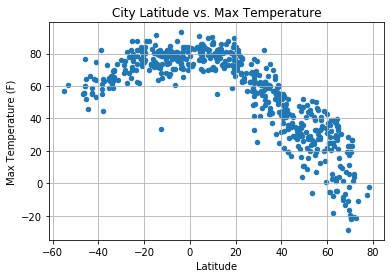

In [9]:
data_df.plot(kind='scatter',x='Lat',y='Max Temp',title='City Latitude vs. Max Temperature')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(b=True)

#### Latitude vs. Humidity Plot

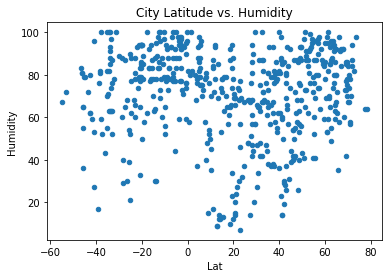

In [10]:
data_df.plot(kind='scatter',x='Lat',y='Humidity',title='City Latitude vs. Humidity')

#### Latitude vs. Cloudiness Plot

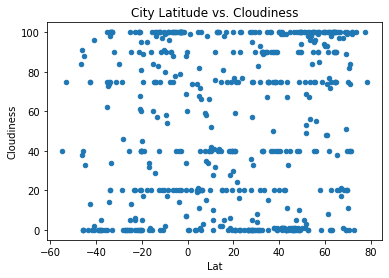

In [11]:
data_df.plot(kind='scatter',x='Lat',y='Cloudiness',title='City Latitude vs. Cloudiness')

#### Latitude vs. Wind Speed Plot

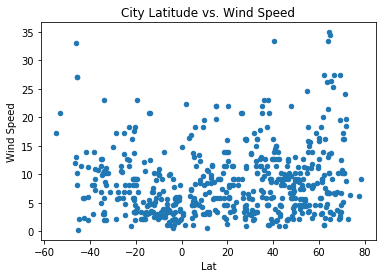

In [12]:
data_df.plot(kind='scatter',x='Lat',y='Wind Speed',title='City Latitude vs. Wind Speed')

## Linear Regression

In [24]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regress(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")
    return "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [25]:
# Create Northern and Southern Hemisphere DataFrames
northernHemisphere = data_df.loc[data_df['Lat']>0]
southernHemisphere = data_df.loc[data_df['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7978988462597384


Text(0, 0, 'y = -1.2x + 93.19')

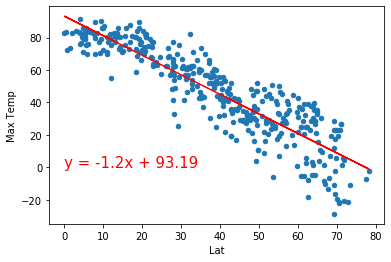

In [26]:
northernHemisphere.plot(kind='scatter',x='Lat',y='Max Temp')
line_eq = linear_regress(northernHemisphere['Lat'],northernHemisphere['Max Temp'])
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.35975696567240956


Text(-30, 50, 'y = 0.42x + 81.35')

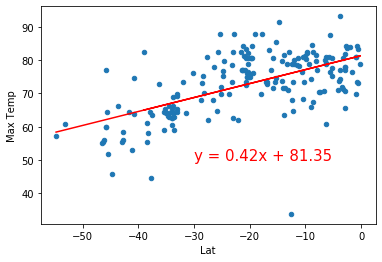

In [27]:
southernHemisphere.plot(kind='scatter',x='Lat',y='Max Temp')
line_eq = linear_regress(southernHemisphere['Lat'],southernHemisphere['Max Temp'])
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.049845863415088267


Text(30, 20, 'y = 0.24x + 58.65')

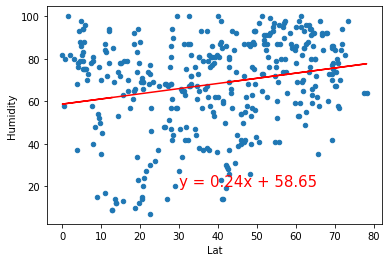

In [28]:
northernHemisphere.plot(kind='scatter',x='Lat',y='Humidity')
line_eq = linear_regress(northernHemisphere['Lat'],northernHemisphere['Humidity'])
plt.annotate(line_eq,(30,20),fontsize=15,color="red")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09675208257529049


Text(-30, 40, 'y = 0.41x + 85.63')

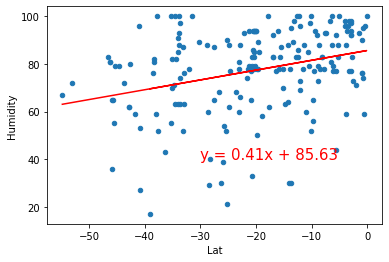

In [29]:
southernHemisphere.plot(kind='scatter',x='Lat',y='Humidity')
line_eq = linear_regress(southernHemisphere['Lat'],southernHemisphere['Humidity'])
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06208099140718518


Text(40, 30, 'y = 0.48x + 32.22')

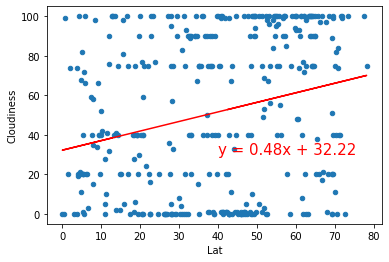

In [30]:
northernHemisphere.plot(kind='scatter',x='Lat',y='Cloudiness')
line_eq = linear_regress(northernHemisphere['Lat'],northernHemisphere['Cloudiness'])
plt.annotate(line_eq,(40,30),fontsize=15,color="red")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07844963407130479


Text(-50, 60, 'y = 0.83x + 70.74')

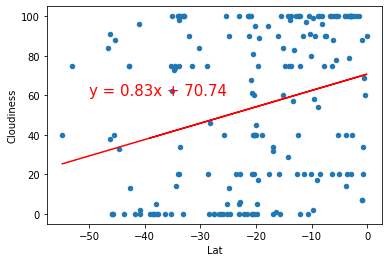

In [31]:
southernHemisphere.plot(kind='scatter',x='Lat',y='Cloudiness')
line_eq = linear_regress(southernHemisphere['Lat'],southernHemisphere['Cloudiness'])
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.018404905555036846


Text(10, 30, 'y = 0.04x + 7.56')

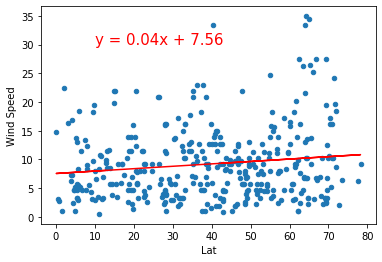

In [32]:
northernHemisphere.plot(kind='scatter',x='Lat',y='Wind Speed')
line_eq = linear_regress(northernHemisphere['Lat'],northernHemisphere['Wind Speed'])
plt.annotate(line_eq,(10,30),fontsize=15,color="red")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.17768210145935187


Text(-30, 30, 'y = -0.17x + 3.93')

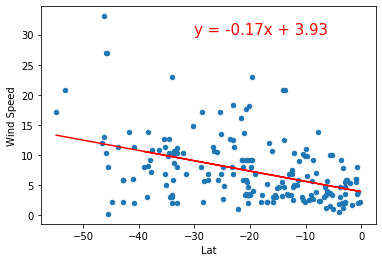

In [33]:
southernHemisphere.plot(kind='scatter',x='Lat',y='Wind Speed')
line_eq = linear_regress(southernHemisphere['Lat'],southernHemisphere['Wind Speed'])
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")